In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv('./Iris.csv')
data = data.drop(['Id'], axis=1)

2022-09-17 18:28:40.091886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 18:28:40.091949: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [2]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


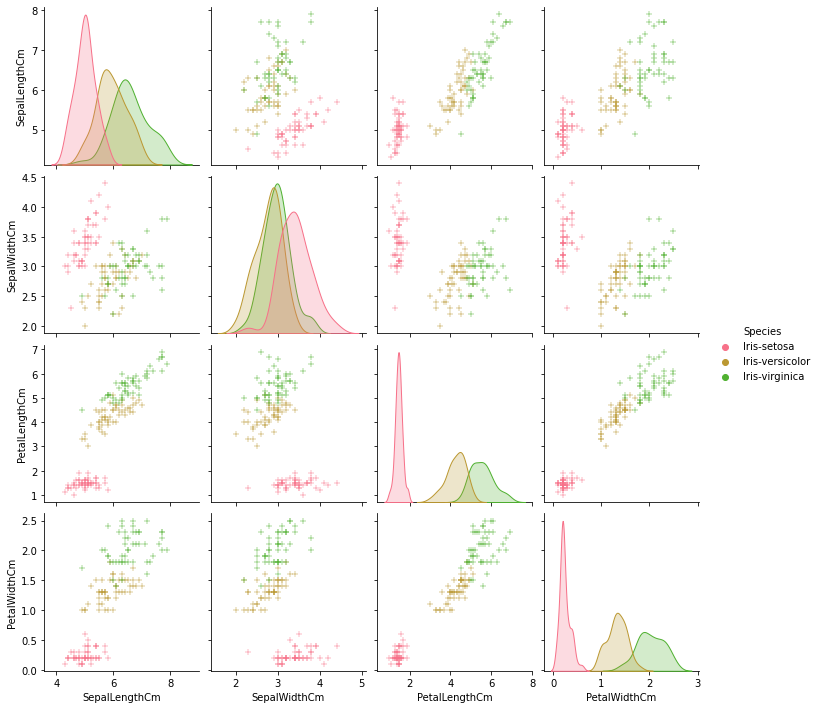

In [6]:
g = sns.pairplot(data, hue='Species', markers='+')
plt.show()

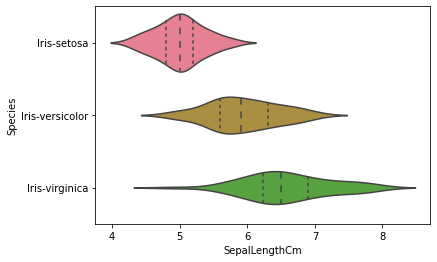

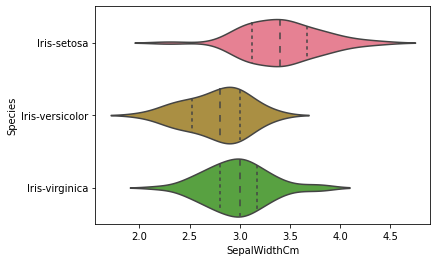

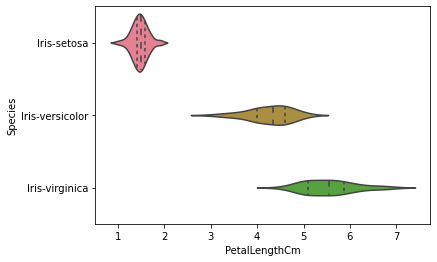

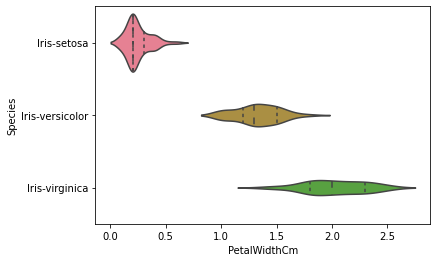

In [7]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

### Observations
1. K Means Algorithm can be used over here since there arent a lot of Outliers in the dataset
2. Iris-setosa is easily distinguishable from the other 2 classes based on Petal Length and Width
3. Sepalwidth and SepalLength dont provide a good distinction between Versicolor and Virginica but Petal does provide a good enough distinction between them

# Data Normalisation

In [8]:
DFColumns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

X = preprocessing.MinMaxScaler(feature_range=(-1,+1)).fit_transform(data.loc[:, data.columns != "Species"])
y = preprocessing.OneHotEncoder(sparse=False).fit_transform(data.loc[:, ['Species']])

print(X.shape)
print(y.shape)

(150, 4)
(150, 3)


## Split the dataset into a training set and a testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90, 3)
(60, 4)
(60, 3)


In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.tanh, use_bias=True),
    keras.layers.Dense(3, use_bias=True, activation=None)
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer= opt,
    loss= keras.losses.BinaryCrossentropy(),
    metrics= ["accuracy"]
)

In [11]:
# Evaluating model for different number of epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 153ms/step - loss: 0.7620 - accuracy: 0.8444 - val_loss: 0.4561 - val_accuracy: 0.8500
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4273 - accuracy: 0.8556 - val_loss: 0.2937 - val_accuracy: 0.8500
Epoch 3/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.3078 - accuracy: 0.8778 - val_loss: 0.2408 - val_accuracy: 0.8500
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.2269 - accuracy: 0.9000 - val_loss: 0.2235 - val_accuracy: 0.8833
Epoch 5/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.2030 - accuracy: 0.9111 - val_loss: 0.2205 - val_accuracy: 0.8667
Epoch 6/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.1985 - accuracy: 0.9222 - val_loss: 0.2239 - val_accuracy: 0.8833
Epoch 7/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.1984 - accuracy: 0.9000 - val_loss: 0.2317 - val_accuracy: 0.8833
Epoch 8/1000

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


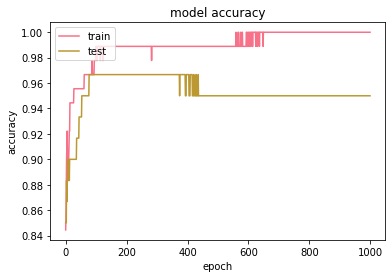

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

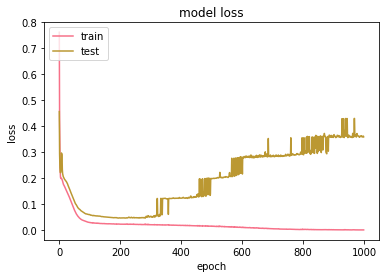

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

At around epochs = 150 the test dataset gets the highest Accuracy and least Loss and so we will save the model at epochs = 150